## Trip Adviser Andaz Review 크롤링과 리뷰 분석
- 이번엔 Andaz 호텔 리뷰 분석 
- 리뷰 평점 5점 만점 중 3점 이하 리뷰를 크롤링
- 리뷰 크롤링 한 txt 파일을 워드클라우드로 표현 

### 1. 크롤링 
- selenium을 이용하여 작업
- 먼저 리뷰 1페이지 크롤링 후 계속 해서 리뷰 페이지 크롤링
- 텍스트 파일 저장 

In [1]:
# 패키지 불러오기 
from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
import time 
import re 
import json
from selenium.webdriver.common.keys import Keys
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import requests
from pandas import json_normalize

In [14]:
reviews = []
# 리뷰 첫페이지 크롤링
url = f"https://www.tripadvisor.co.kr/Hotel_Review-g294197-d17784746-Reviews-or-Andaz_Seoul_Gangnam-Seoul.html"
driver = webdriver.Chrome()
driver.get(url)

webdriver.ActionChains(driver).send_keys(Keys.ESCAPE).perform()
normal_button = driver.find_element_by_xpath('//*[@id="component_14"]/div/div[3]/div[1]/div[1]/div[1]/ul/li[3]/label')
bad_button = driver.find_element_by_xpath('//*[@id="component_14"]/div/div[3]/div[1]/div[1]/div[1]/ul/li[4]/label')
worst_button = driver.find_element_by_xpath('//*[@id="component_14"]/div/div[3]/div[1]/div[1]/div[1]/ul/li[5]/label')

try:
    normal_button.click()
except:
    pass
try:
    bad_button.click()
except:
    pass
try:
    worst_button.click()
except:
    pass

review = driver.find_elements_by_xpath('//*[@id="component_14"]/div/div[3]/div/div/div[3]/div[1]/div[1]/q/span')

for i in range(0,len(review)):
    reviews.append(review[i].text)

In [15]:
# 리뷰페이지 전체 크롤링

for i in range(5, 1000, 5):
    url = f"https://www.tripadvisor.co.kr/Hotel_Review-g294197-d17784746-Reviews-or{i}-Andaz_Seoul_Gangnam-Seoul.html"
    driver.get(url)

    webdriver.ActionChains(driver).send_keys(Keys.ESCAPE).perform()
    normal_button = driver.find_element_by_xpath('//*[@id="component_14"]/div/div[3]/div[1]/div[1]/div[1]/ul/li[3]/label')
    bad_button = driver.find_element_by_xpath('//*[@id="component_14"]/div/div[3]/div[1]/div[1]/div[1]/ul/li[4]/label')
    worst_button = driver.find_element_by_xpath('//*[@id="component_14"]/div/div[3]/div[1]/div[1]/div[1]/ul/li[5]/label')
    

    review = driver.find_elements_by_xpath('//*[@id="component_14"]/div/div[3]/div/div/div[3]/div[1]/div[1]/q/span')
    
    if not review:
        break
        
    for i in range(0,len(review)):
        reviews.append(review[i].text)

print('done')

# 크롬드라이버 종료 
driver.quit()

done


In [16]:
# txt 파일 저장 
with open('ad_andaz.txt', 'w') as f:
    for line in reviews:
        f.write(line)

### 2. 워드 클라우드 만들기 

In [18]:
# 한글문장 테스트
import nltk
import konlpy
from konlpy.tag import Kkma
kkma = Kkma()

In [19]:
kkma.sentences("한국어 테스트")

['한국어 테스트']

#### 2-1. 텍스트 파일 빈도수  확인 

In [44]:
def tag_counting(file):
    
    # 텍스트 파일 불러오기 
    f = open("datas/ad_andaz.txt", "r")
    line = f.read()

    # 명사 추출 
    from konlpy.tag import Twitter
    nlpy = Twitter()
    nouns = nlpy.nouns(line)

    # 추출된 키워드 빈도수 확인 
    from collections import Counter
    count = Counter(nouns)

    tag_count = []
    tags = []

    for n, c in count.most_common(1600):
        dics = {'tag': n, 'count': c}
        if len(dics['tag']) >= 2 and len(tags) <=1000:
            tag_count.append(dics)
            tags.append(dics['tag'])

     # 각 명사의 빈도수 추출 
    for tag in tag_count:
        print(' {:<14}'.format(tag['tag']), end='\t')
        print("{}".format(tag['count'])) 
        
    print("\n------------------------------")
    print("   명사 총 {}개".format(len(tags)))
    print("----------------------------\n\n")
            
    return tags

In [45]:
tags = tag_counting(file = "blog")
print(tags)

 호텔            	39
 직원            	24
 객실            	17
 서비스           	16
 응대            	14
 고객            	12
 투숙            	11
 이용            	11
 가격            	10
 상태            	10
 조식            	9
 수영장           	9
 방문            	9
 위치            	9
 메뉴            	9
 정도            	8
 하얏트           	8
 요청            	8
 강남            	7
 예약            	7
 다른            	7
 체크아웃          	7
 생각            	7
 기대            	7
 아주            	7
 퀄리티           	6
 부분            	6
 하나            	6
 정말            	6
 청소            	6
 냄새            	6
 식사            	6
 자리            	6
 결제            	6
 공사            	6
 전반            	6
 브랜드           	5
 체크            	5
 시간            	5
 조금            	5
 세면대           	5
 전화            	5
 하니            	5
 빙어            	5
 느낌            	5
 오픈            	5
 시설            	5
 룸서비스          	4
 매우            	4
 라면            	4
 청결            	4
 레스토랑          	4
 조각보           	4
 화장실           	4
 패키지           	4


#### 2-2. 빈도수 그래프 나타내기

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import font_manager, rc
import sys
from matplotlib import font_manager

# 막대그래프에 사용될 글꼴을 설
if sys.platform in ['win32', 'win64']:
    font_name = 'malgun gothic'
elif sys.platform == 'darwin':
    font_name = 'AppleGothic'
f_path = "/Users/"
rc('font', family = font_name)

In [48]:
# 다시 명사형 분석 
import nltk
from konlpy.tag import Okt; t = Okt()

In [51]:
ko = nltk.Text(nouns, name="호텔 3점이하 리뷰")
print(len(ko.tokens))
print(len(set(ko.tokens)))

1589
774


In [57]:
# 빈도수 
ko = nltk.Text(nouns, name="호텔 3점이하 리뷰")
ko.vocab().most_common(1500)

[('호텔', 39),
 ('직원', 24),
 ('객실', 17),
 ('서비스', 16),
 ('방', 16),
 ('응대', 14),
 ('것', 14),
 ('고객', 12),
 ('투숙', 11),
 ('더', 11),
 ('이용', 11),
 ('가격', 10),
 ('좀', 10),
 ('상태', 10),
 ('조식', 9),
 ('수영장', 9),
 ('방문', 9),
 ('위치', 9),
 ('메뉴', 9),
 ('정도', 8),
 ('하얏트', 8),
 ('말', 8),
 ('요청', 8),
 ('번', 7),
 ('때', 7),
 ('강남', 7),
 ('예약', 7),
 ('다른', 7),
 ('체크아웃', 7),
 ('생각', 7),
 ('기대', 7),
 ('아주', 7),
 ('등', 7),
 ('퀄리티', 6),
 ('부분', 6),
 ('하나', 6),
 ('정말', 6),
 ('청소', 6),
 ('냄새', 6),
 ('식사', 6),
 ('점', 6),
 ('자리', 6),
 ('개', 6),
 ('결제', 6),
 ('룸', 6),
 ('도', 6),
 ('공사', 6),
 ('전반', 6),
 ('브랜드', 5),
 ('체크', 5),
 ('시간', 5),
 ('조금', 5),
 ('세면대', 5),
 ('전', 5),
 ('전화', 5),
 ('하니', 5),
 ('듯', 5),
 ('이', 5),
 ('빙어', 5),
 ('저', 5),
 ('비', 5),
 ('층', 5),
 ('문', 5),
 ('느낌', 5),
 ('오픈', 5),
 ('시설', 5),
 ('룸서비스', 4),
 ('매우', 4),
 ('라면', 4),
 ('그', 4),
 ('또', 4),
 ('청결', 4),
 ('레스토랑', 4),
 ('내', 4),
 ('조각보', 4),
 ('화장실', 4),
 ('패키지', 4),
 ('확인', 4),
 ('시', 4),
 ('계열', 4),
 ('비지니스', 4),
 ('뭐', 4),
 ('이상', 4

In [56]:
ko.similar('직원')

고객


In [58]:
# 스톱 워드 
stop_words = ['것', '더', '좀', '번', '때', '등', '점', '개', '도', '전', '듯', '이', '저', '비',
             '층', '그', '내', '시', '후', '함', '임', '나', '날', '제', '앤', '및', '편', '라',
             '보', '박', '스', '알', '살', '양', '를', '기', '인', '애', '못', '수', '곳', '객',
             '채', '위', '걸']

token_ko = [each_word for each_word in nouns if each_word not in stop_words]

ko = nltk.Text(token_ko, name='호텔')
ko.vocab().most_common(50)

[('호텔', 39),
 ('직원', 24),
 ('객실', 17),
 ('서비스', 16),
 ('방', 16),
 ('응대', 14),
 ('고객', 12),
 ('투숙', 11),
 ('이용', 11),
 ('가격', 10),
 ('상태', 10),
 ('조식', 9),
 ('수영장', 9),
 ('방문', 9),
 ('위치', 9),
 ('메뉴', 9),
 ('정도', 8),
 ('하얏트', 8),
 ('말', 8),
 ('요청', 8),
 ('강남', 7),
 ('예약', 7),
 ('다른', 7),
 ('체크아웃', 7),
 ('생각', 7),
 ('기대', 7),
 ('아주', 7),
 ('퀄리티', 6),
 ('부분', 6),
 ('하나', 6),
 ('정말', 6),
 ('청소', 6),
 ('냄새', 6),
 ('식사', 6),
 ('자리', 6),
 ('결제', 6),
 ('룸', 6),
 ('공사', 6),
 ('전반', 6),
 ('브랜드', 5),
 ('체크', 5),
 ('시간', 5),
 ('조금', 5),
 ('세면대', 5),
 ('전화', 5),
 ('하니', 5),
 ('빙어', 5),
 ('문', 5),
 ('느낌', 5),
 ('오픈', 5)]

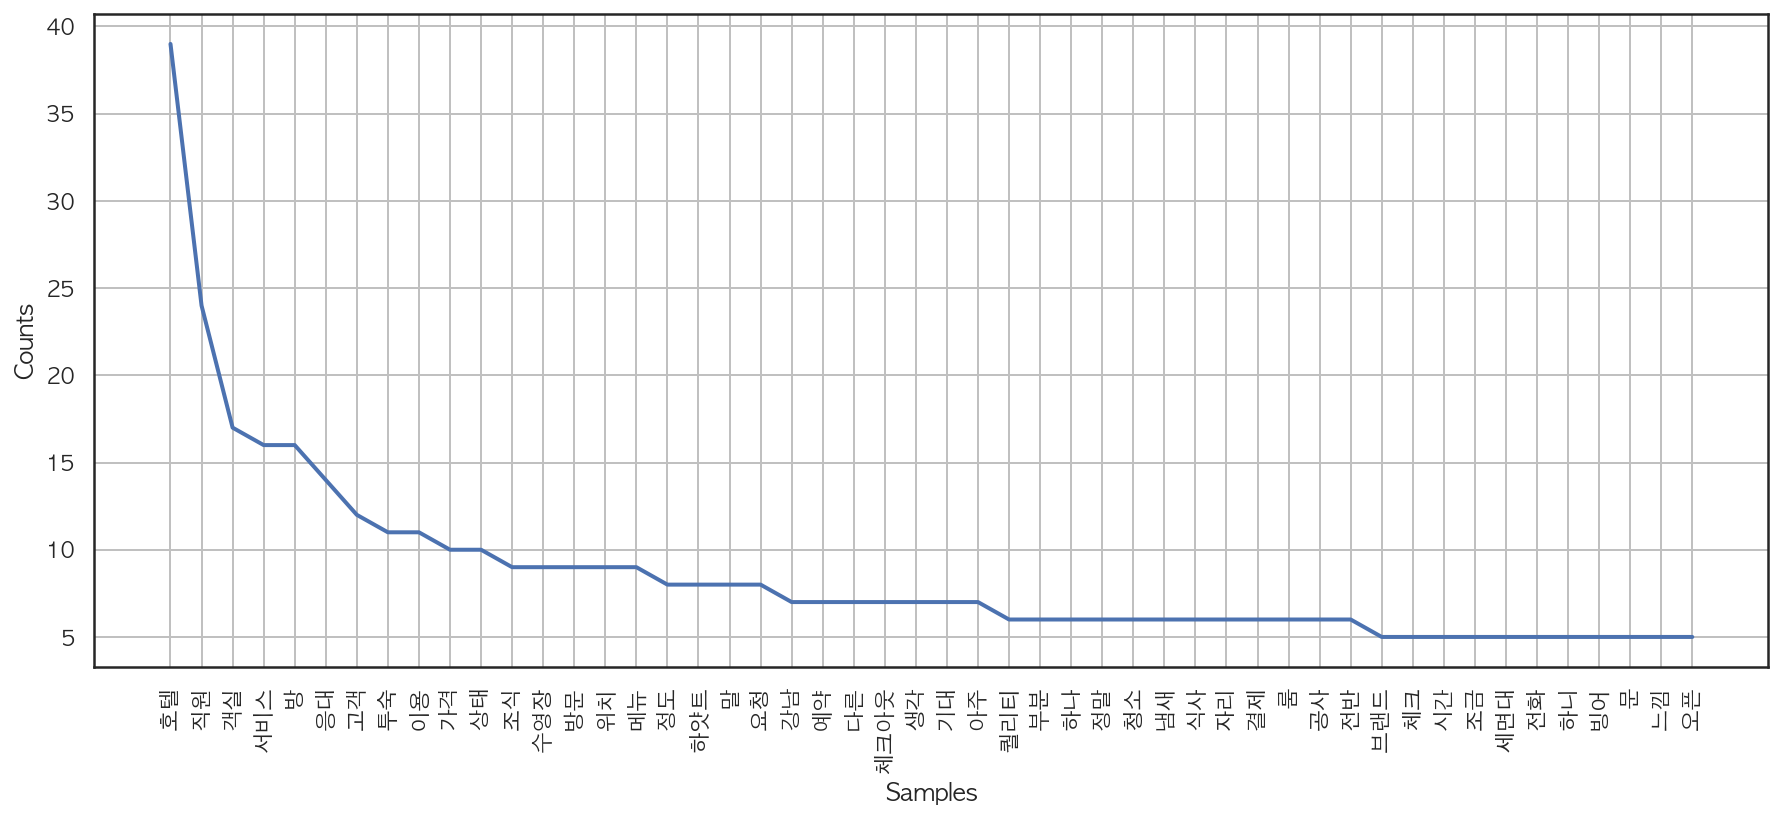

In [59]:
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

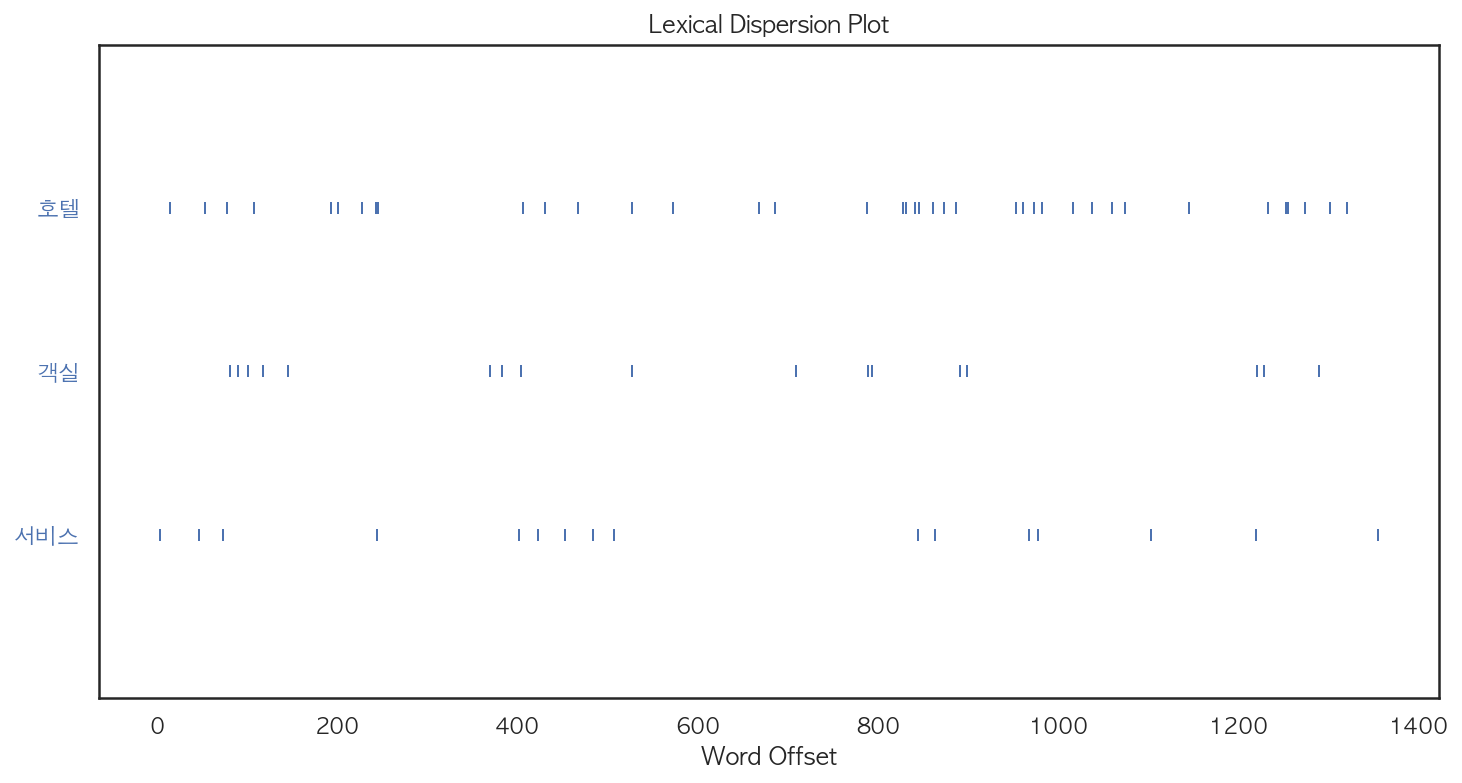

In [60]:
# 리뷰내의 특정 단어 위치 
plt.figure(figsize=(12,6))
ko.dispersion_plot(['호텔', '객실', '서비스'])

#### 2-3 워드클라우드 

In [63]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# 윈도우 맥 환경에 맞게 글꼴 설정 
import platform
if platform.system() == 'Windows':   
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":  
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

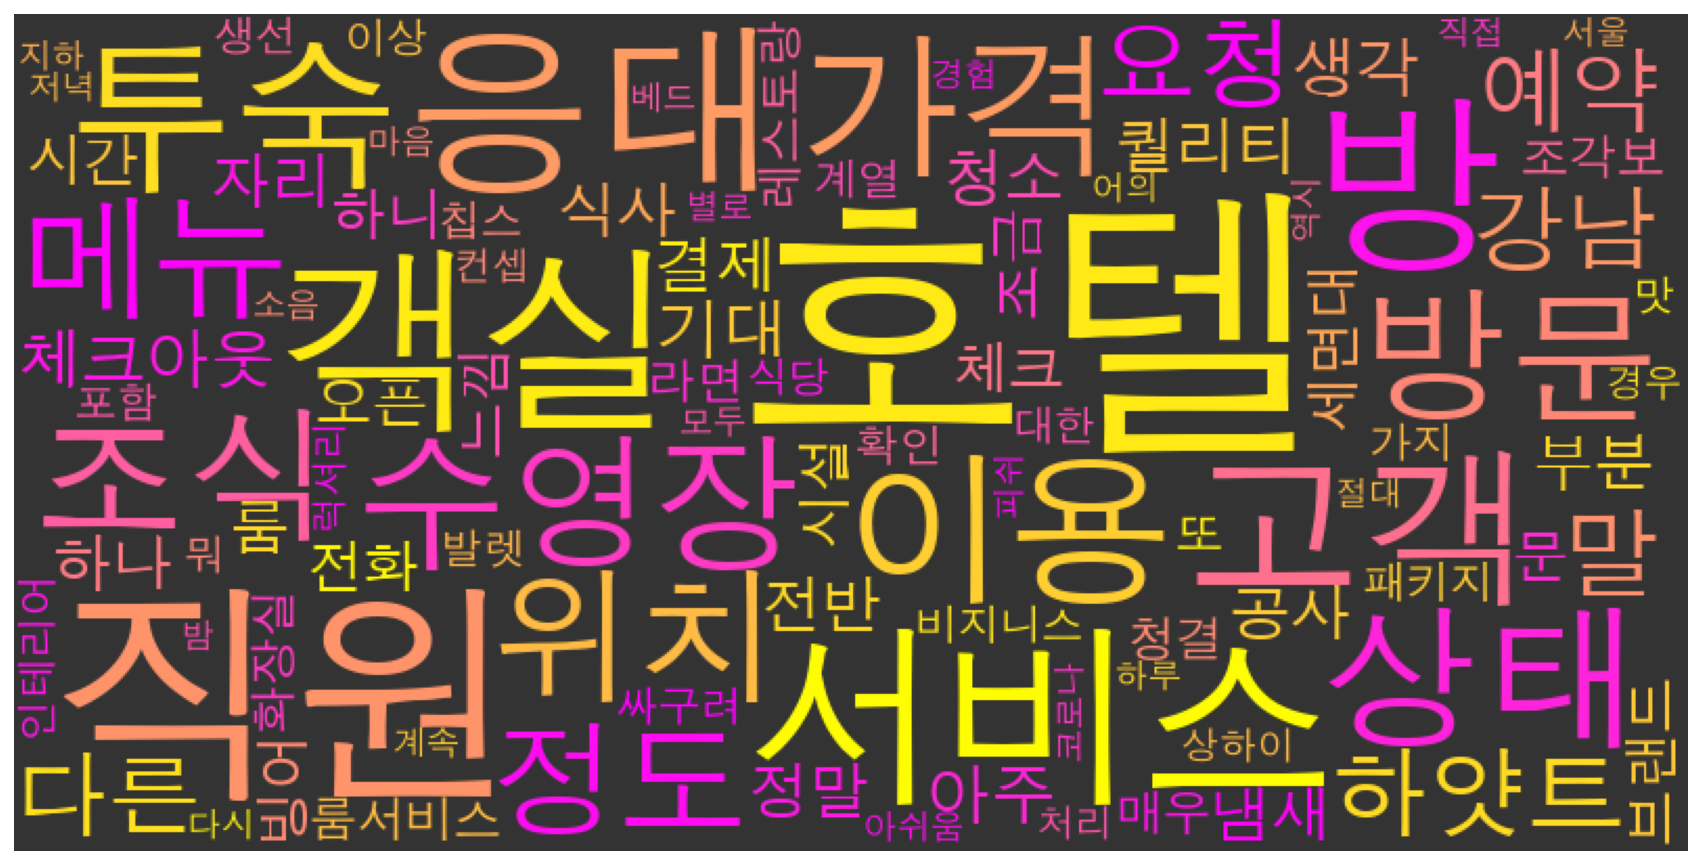

In [64]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path=font_path,
                      colormap='spring',
                     background_color="#333333",
                     max_words=100,
                     relative_scaling=0.5,
                     width=800,
                     height=400).generate_from_frequencies(dict(data))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud )
plt.axis('off')
plt.show()

- 3점 이하이 평점을 분석해 본 결과 고객들은 호텔의 명성에 맞게 호캉스를 즐기려고 왔으나, 직원들의 응대 서비스가 마음에 들지 않았고, 가격이 꽤 높은 고급 호텔임에도 객실의 평가가 낮음을 나타날 수 있다. 
- 몬드리안 호텔과 똑같이 가장 마음에 들지 않은 부분은 바로 직원의 응대 태도와 서비스였다.

#### 2-4 워드클라우드 마스킹

In [65]:
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('datas/instagram.png'))
image_color = ImageColorGenerator(mask)

In [69]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path=font_path,
                     relative_scaling=0.1, mask=mask,
                     background_color='white',
                     min_font_size=1,
                     max_font_size=100).generate_from_frequencies(dict(data))

defalut_colors = wordcloud.to_array()

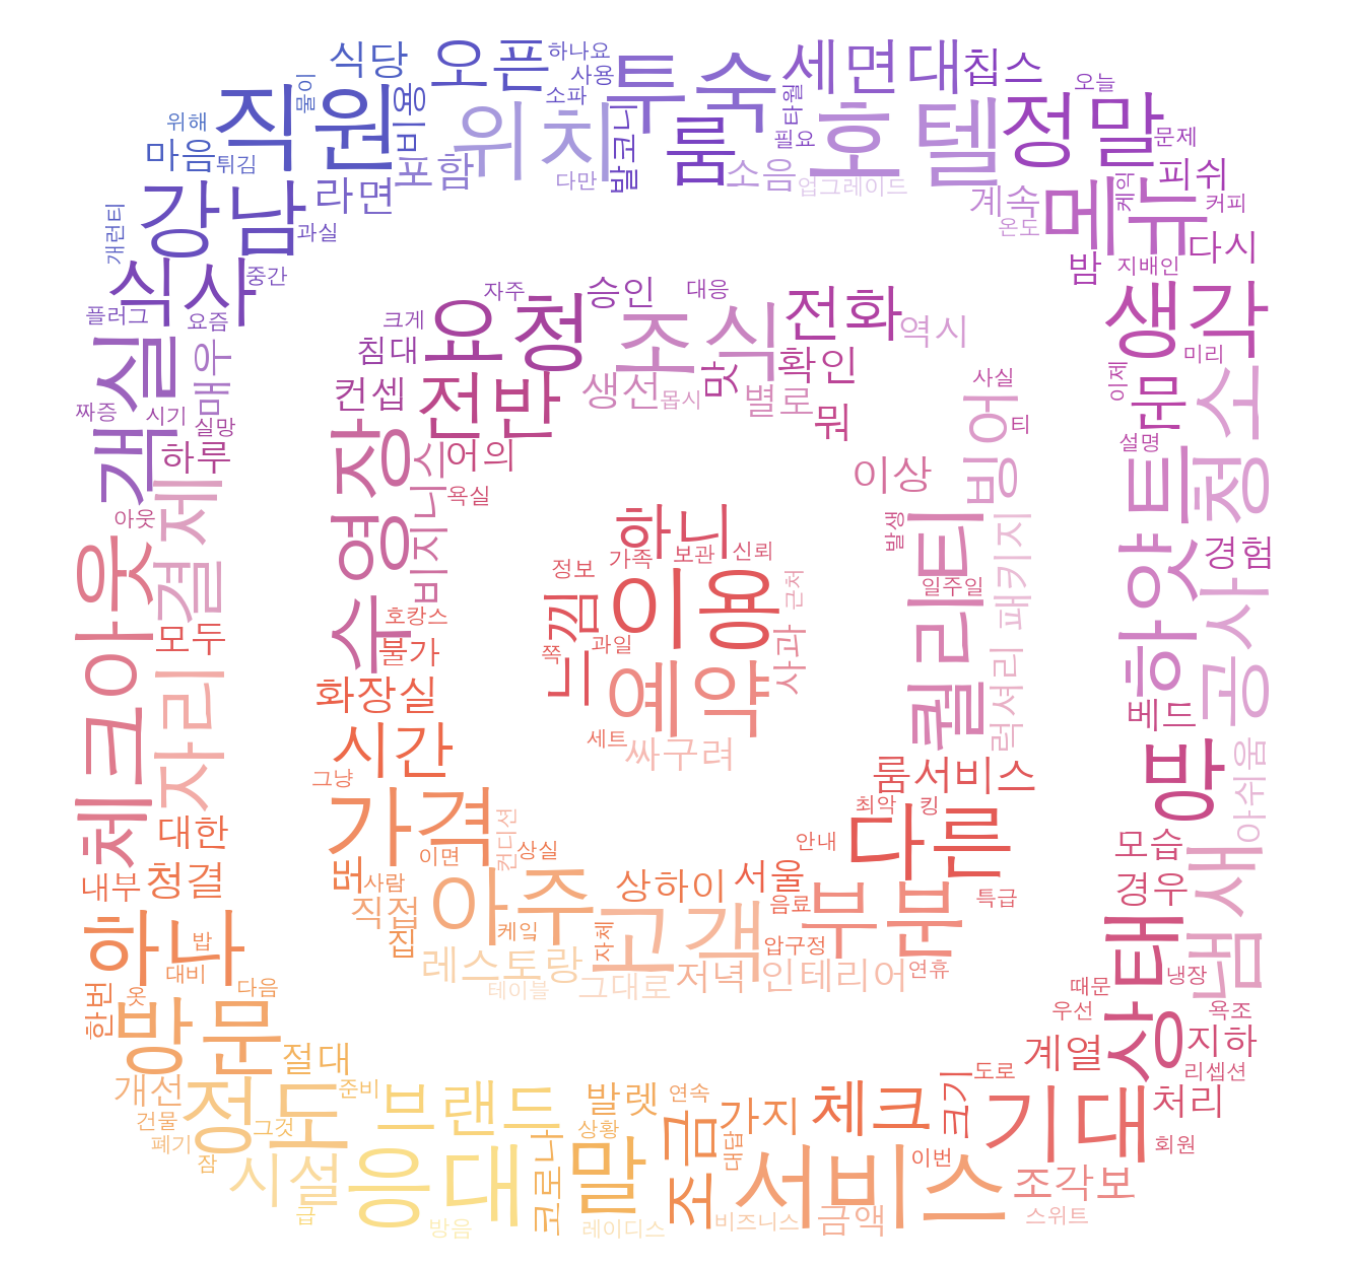

In [70]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_color),
          interpolation='bilinear')
plt.axis('off')
plt.show()